In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sunpy
import sunpy.map
from sunpy.coordinates import (get_earth, get_horizons_coord,
                                Helioprojective, propagate_with_solar_surface)
import sunkit_image
import sunkit_image.coalignment as coalignment
import astropy
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import astropy.units as u
import astropy.constants as const

import cmcrameri.cm as cmcm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import (AutoLocator, AutoMinorLocator, 
    FixedLocator, FixedFormatter, LogLocator, StrMethodFormatter)

from astropy.visualization import (AsinhStretch, LinearStretch,
        LogStretch, ImageNormalize)
import os

In [2]:
def plot_colorbar(im, ax, width="3%", height="100%",loc="lower left",fontsize=14,
                  bbox_to_anchor=(1.02, 0., 1, 1),orientation="vertical"):
    clb_ax = inset_axes(ax,width=width,height=height,loc=loc,
                bbox_to_anchor=bbox_to_anchor,
                 bbox_transform=ax.transAxes,
                 borderpad=0)
    clb = plt.colorbar(im,pad = 0.05,orientation=orientation,ax=ax,cax=clb_ax)
    clb_ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    clb_ax.yaxis.get_offset_text().set_fontsize(fontsize)
    clb_ax.tick_params(labelsize=fontsize)
    return clb, clb_ax

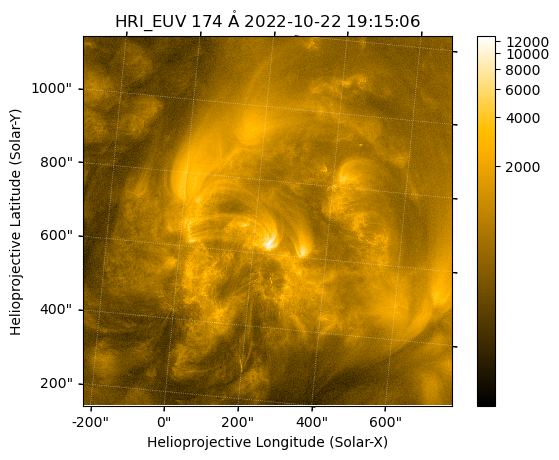

In [3]:
hri_174_map = sunpy.map.Map("../../src/EUI/HRI/euv174/20221022/solo_L2_eui-hrieuv174-image_20221022T191505252_V01.fits")
hri_174_map.plot()
plt.colorbar()

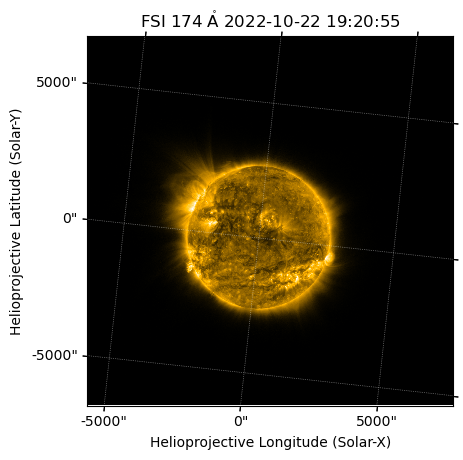

In [4]:
fsi_174_map = sunpy.map.Map("../../src/EUI/FSI/euv174/20221022/solo_L2_eui-fsi174-image_20221022T192050259_V01.fits")
fsi_174_map.plot()

In [12]:
fsi_174_crop = fsi_174_map.submap(SkyCoord(-500*u.arcsec,0*u.arcsec,frame=fsi_174_map.coordinate_frame),
                                    top_right=SkyCoord(1000*u.arcsec,1500*u.arcsec,frame=fsi_174_map.coordinate_frame))

In [13]:
with propagate_with_solar_surface(rotation_model="rigid"):
    hri_174_map_repro = hri_174_map.reproject_to(fsi_174_crop.wcs)

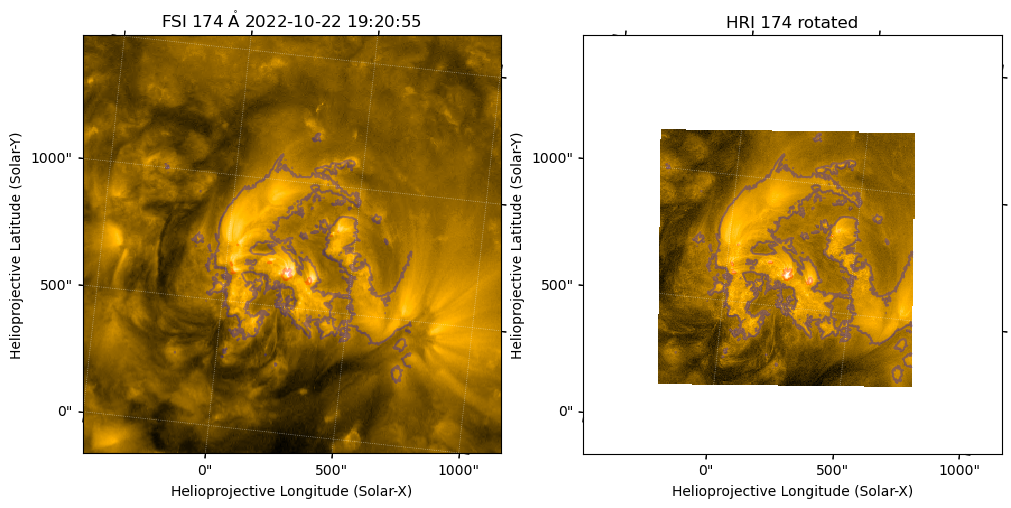

In [15]:
fig = plt.figure(figsize=(10,5),constrained_layout=True)

ax1 = fig.add_subplot(121,projection=fsi_174_crop)
im1 = fsi_174_crop.plot()

ax2 = fig.add_subplot(122,projection=hri_174_map_repro)
im2 = hri_174_map_repro.plot()
ax2.set_title("HRI 174 rotated")

hri_levels = [1000,5000]

for ax_ in (ax1,ax2):
    bounds = ax_.axis()
    hri_174_map_repro.draw_contours(hri_levels,colors=["b","r"], axes=ax_, alpha=0.3)
    ax_.axis(bounds)


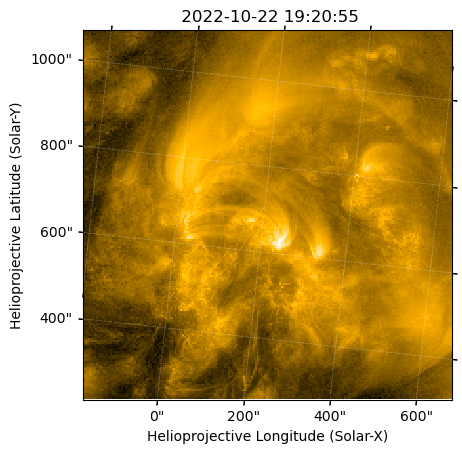

In [53]:
hri_174_map_repro_cut = hri_174_map_repro.submap([79,77]*u.pix,
                                                 top_right=[272,270]*u.pix)
hri_174_map_repro_cut.plot()

In [54]:
yshift_hri_fsi, xshift_hri_fsi = coalignment._calculate_shift(fsi_174_crop.data,hri_174_map_repro_cut.data)

In [63]:
reference_coord_hri = fsi_174_crop.pixel_to_world(xshift_hri_fsi, yshift_hri_fsi)
Txshift_hri = reference_coord_hri.Tx - hri_174_map_repro_cut.bottom_left_coord.Tx
Tyshift_hri = reference_coord_hri.Ty - hri_174_map_repro_cut.bottom_left_coord.Ty
print(Txshift_hri)
print(Tyshift_hri)
hri_174_map_repro_shift = hri_174_map_repro.shift_reference_coord(Txshift_hri,Tyshift_hri)
hri_174_map_repro_cut_shift = hri_174_map_repro_cut.shift_reference_coord(Txshift_hri,Tyshift_hri)

6.55003 arcsec
8.26095 arcsec


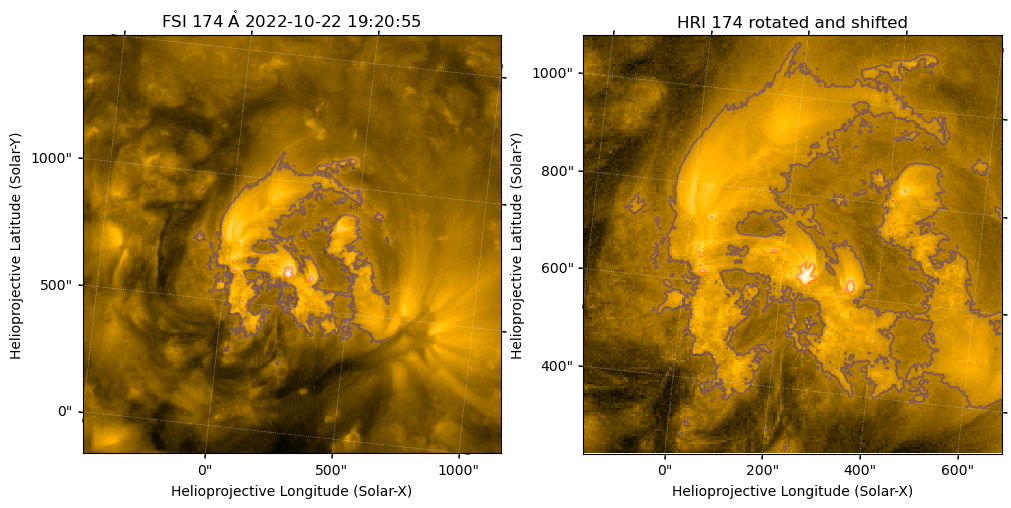

In [64]:
fig = plt.figure(figsize=(10,5),constrained_layout=True)

ax1 = fig.add_subplot(121,projection=fsi_174_crop)
im1 = fsi_174_crop.plot()

ax2 = fig.add_subplot(122,projection=hri_174_map_repro_cut_shift)
im2 = hri_174_map_repro_cut_shift.plot()
ax2.set_title("HRI 174 rotated and shifted")

hri_levels = [1000,5000]

for ax_ in (ax1,ax2):
    bounds = ax_.axis()
    hri_174_map_repro_cut_shift.draw_contours(hri_levels,colors=["b","r"], axes=ax_, alpha=0.3)
    ax_.axis(bounds)


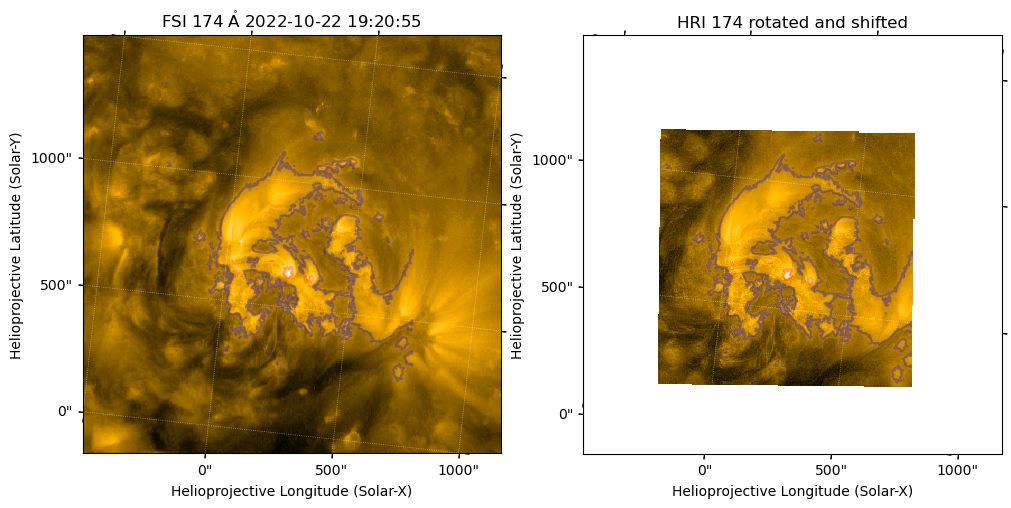

In [65]:
fig = plt.figure(figsize=(10,5),constrained_layout=True)

ax1 = fig.add_subplot(121,projection=fsi_174_crop)
im1 = fsi_174_crop.plot()

ax2 = fig.add_subplot(122,projection=hri_174_map_repro_shift)
im2 = hri_174_map_repro_shift.plot()
ax2.set_title("HRI 174 rotated and shifted")

hri_levels = [1000,5000]

for ax_ in (ax1,ax2):
    bounds = ax_.axis()
    hri_174_map_repro_shift.draw_contours(hri_levels,colors=["b","r"], axes=ax_, alpha=0.3)
    ax_.axis(bounds)


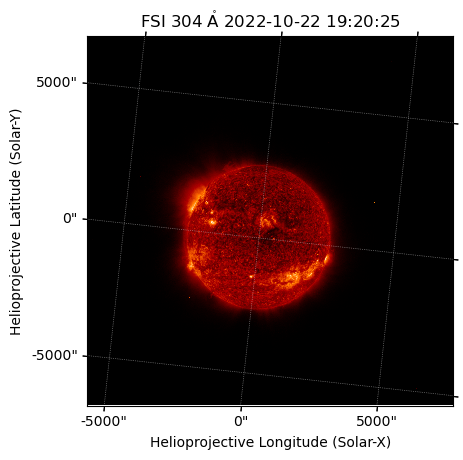

In [68]:
fsi_304_map = sunpy.map.Map("../../src/EUI/FSI/euv304/20221022/solo_L2_eui-fsi304-image_20221022T192020259_V01.fits")
fsi_304_map.plot()

In [69]:
fsi_304_map.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'HPLN-TAN' 'HPLT-TAN' 
CRVAL : 0.11672003354121 0.19098431398884 
CRPIX : 1536.5 1536.5 
PC1_1 PC1_2  : 0.99403323348716 -0.10907763621873 
PC2_1 PC2_2  : 0.10907763621873 0.99403323348716 
CDELT : 0.0012333679027778 0.0012333679027778 
NAXIS : 3040  3072

In [70]:
fsi_174_map.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'HPLN-TAN' 'HPLT-TAN' 
CRVAL : 0.11740922095741 0.19144573407866 
CRPIX : 1536.5 1536.5 
PC1_1 PC1_2  : 0.99403334182531 -0.10907664891991 
PC2_1 PC2_2  : 0.10907664891991 0.99403334182531 
CDELT : 0.0012333679027778 0.0012333679027778 
NAXIS : 3040  3072

In [71]:
fsi_304_crop = fsi_304_map.submap(SkyCoord(-500*u.arcsec,0*u.arcsec,frame=fsi_304_map.coordinate_frame),
                                    top_right=SkyCoord(1000*u.arcsec,1500*u.arcsec,frame=fsi_304_map.coordinate_frame))

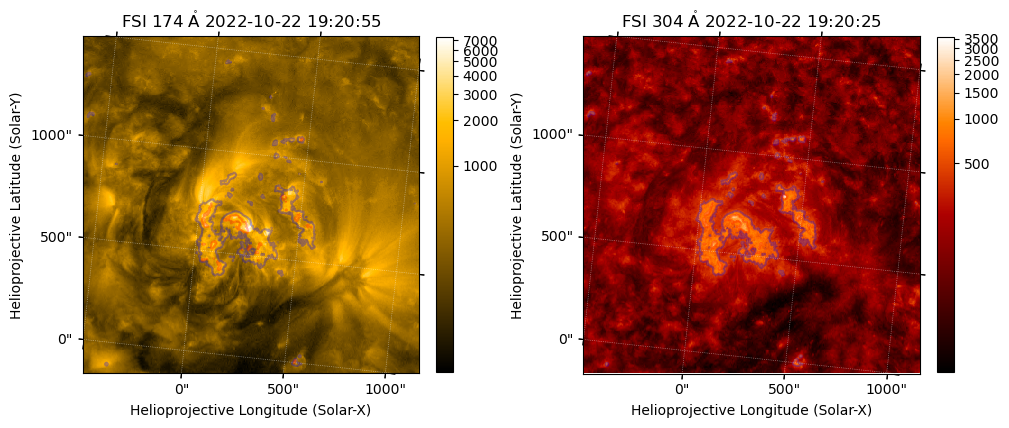

In [76]:
fig = plt.figure(figsize=(10,5),constrained_layout=True)

ax1 = fig.add_subplot(121,projection=fsi_174_crop)
im1 = fsi_174_crop.plot()
plt.colorbar(ax=ax1,shrink=0.75)

ax2 = fig.add_subplot(122,projection=fsi_304_crop)
im2 = fsi_304_crop.plot()
plt.colorbar(ax=ax2,shrink=0.75)

fsi_304_levels = [500,1000]*fsi_304_crop.unit

for ax_ in (ax1,ax2):
    bounds = ax_.axis()
    fsi_304_crop.draw_contours(fsi_304_levels,colors=["b","r"], axes=ax_, alpha=0.3)
    ax_.axis(bounds)


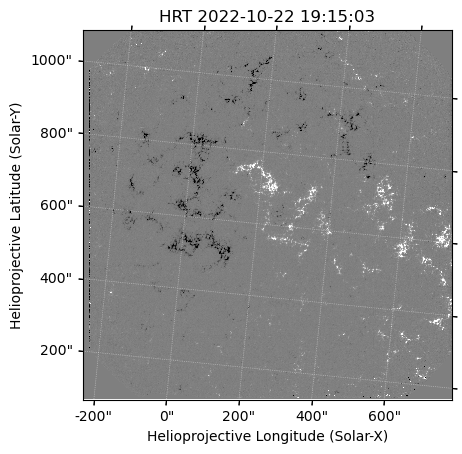

In [77]:
phi_los_map = sunpy.map.Map("../../src/PHI/20221022/solo_L2_phi-hrt-blos_20221022T191503_V01.fits")
phi_los_map.plot_settings['norm'] = plt.Normalize(-500, 500)
phi_los_map.plot()